In [19]:
import soundfile as sf
import numpy as np
from matplotlib import pyplot as plt
from scipy import fft, signal

## Estrazione dei dati

In [20]:
# leggiamo i contenuti di un file audio(.wav)
audio, samplerate = sf.read("diapason.wav")

#canale 1
ch1 = audio[:,0]

#canale 2
ch2 = audio[:,1]

#### Waveform del file audio 

Text(0, 0.5, 'Ampiezza')

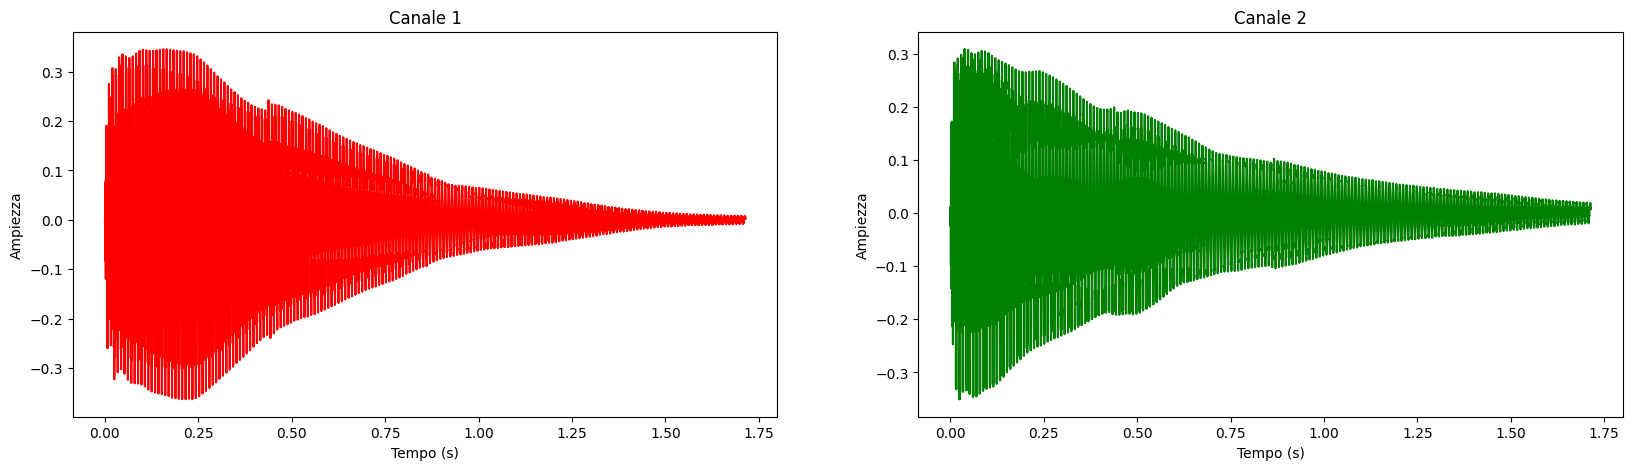

In [21]:
#per avere i secondi(asse x)
Time = np.linspace(0, len(ch1)/ samplerate, num=len(ch1))

fig, ax = plt.subplots(ncols=2, figsize=(20, 5))

#plot canale 1
ax[0].plot(Time, ch1, "r")
ax[0].set_title("Canale 1")
ax[0].set_xlabel("Tempo (s)")
ax[0].set_ylabel("Ampiezza")

#plot canale 2
ax[1].plot(Time, ch2, "g")
ax[1].set_title("Canale 2")
ax[1].set_xlabel("Tempo (s)")
ax[1].set_ylabel("Ampiezza")

### FFT(fast fourier transform) 

per comodità prenderemo in esame solo il primo canale, ora calcoliamo la trasformata di fourier

In [22]:
#transformata di fourier
ch1_fft = fft.fft(ch1)

### Spettro di potenza

calcolo dello spettro di potenza, e successiva conversione in decibel

In [23]:
# calcolo spettro di potenza
ch1_pwr_spectrum = np.abs(ch1_fft[:len(ch1)//2])**2
# conversione in decibel
power_spectrum_db = 10 * np.log10(ch1_pwr_spectrum) 

### Plot parte reale e immaginaria

Text(0, 0.5, 'Ampiezza')

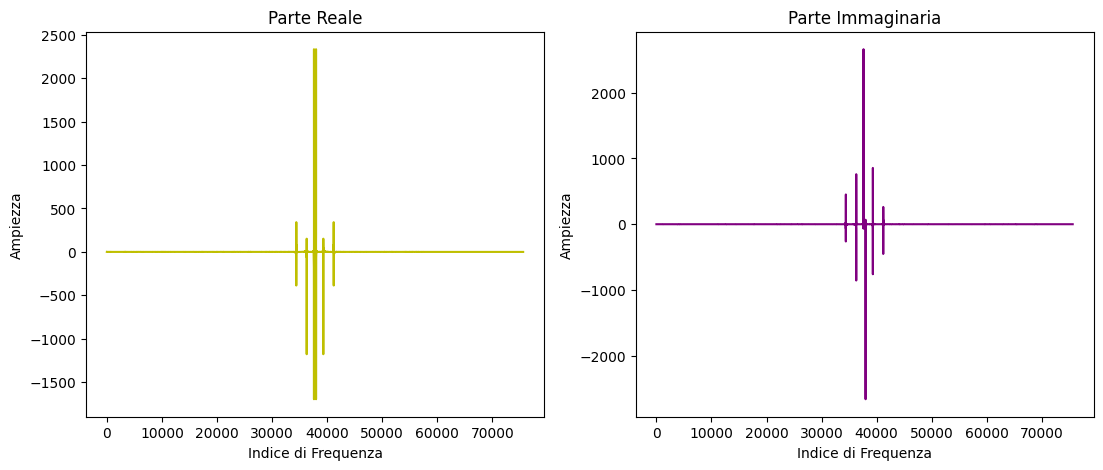

In [24]:
#creazione layout plot
fig, ax = plt.subplots(ncols=2, figsize=(13, 5))

#parte reale
ax[0].plot(np.fft.fftshift(np.real(ch1_fft)), "y")
ax[0].set_title("Parte Reale")
ax[0].set_xlabel("Indice di Frequenza")
ax[0].set_ylabel("Ampiezza")
#parte immaginaria
ax[1].plot(np.fft.fftshift(np.imag(ch1_fft)), "purple")
ax[1].set_title("Parte Immaginaria")
ax[1].set_xlabel("Indice di Frequenza")
ax[1].set_ylabel("Ampiezza")

### Plot spettro di potenza

Text(0, 0.5, 'Potenza (Db)')

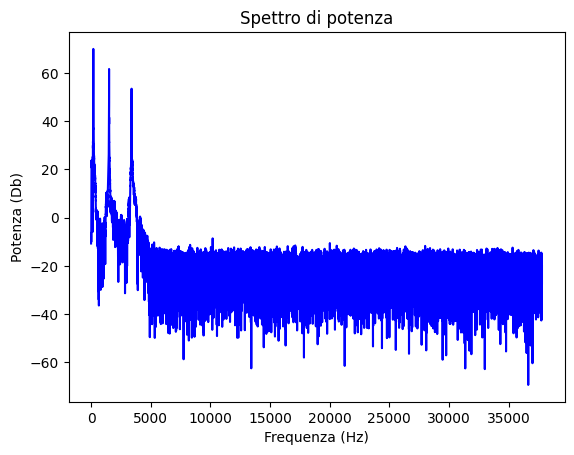

In [25]:
plt.plot(power_spectrum_db, "blue")
plt.title("Spettro di potenza")
plt.xlabel("Frequenza (Hz)")
plt.ylabel("Potenza (Db)")

### Cerchiamo i picchi 

cerchiamo i picchi 

[-10.74173576  -9.71732298  -8.16389629 ... -19.7135794  -27.62542881
 -20.14483833]


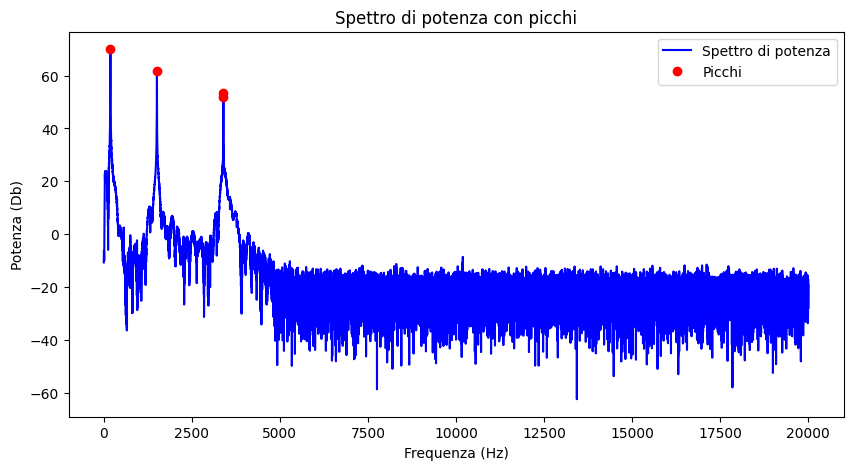

In [ ]:
#soglia dei decibel(qualque cosa sopra il valore indicato verra contrassegnato)
height= 50

#limite hz
limit = 20000

#cerca i picchi con i parametri scelti
peaks, _ = signal.find_peaks(power_spectrum_db, height=height)

print(power_spectrum_db)

plt.figure(figsize=(10, 5))
plt.plot(power_spectrum_db[:limit], "blue", label="Spettro di potenza")
plt.plot(peaks, power_spectrum_db[peaks],"o" , label="Picchi",color="red")
plt.title("Spettro di potenza con picchi")
plt.xlabel("Frequenza (Hz)")
plt.ylabel("Potenza (Db)")
plt.legend()


### Larghezza dei picchi

TypeError: hlines() missing 3 required positional arguments: 'y', 'xmin', and 'xmax'

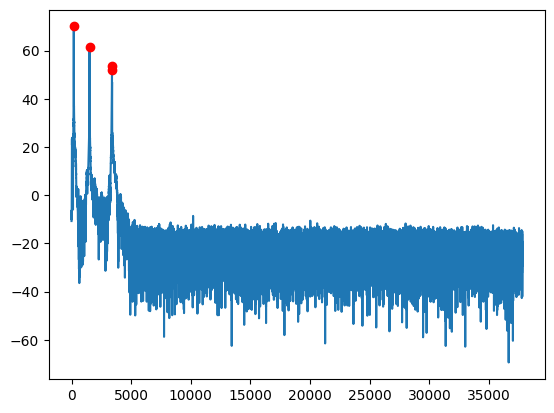

In [ ]:
width = signal.peak_widths(power_spectrum_db, peaks)

plt.plot(power_spectrum_db)
plt.plot(peaks, power_spectrum_db[peaks],"o" , label="Picchi",color="red")
plt.hlines(*width)